# Projeto de Machine Learning Utilizando o Bank Marketing Data Set
Disponivel em https://archive.ics.uci.edu/ml/datasets/Bank+Marketing#

## Data Set Information:

The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed. 

There are four datasets: 
1) bank-additional-full.csv with all examples (41188) and 20 inputs, ordered by date (from May 2008 to November 2010), very close to the data analyzed in [Moro et al., 2014]
2) bank-additional.csv with 10% of the examples (4119), randomly selected from 1), and 20 inputs.
3) bank-full.csv with all examples and 17 inputs, ordered by date (older version of this dataset with less inputs). 
4) bank.csv with 10% of the examples and 17 inputs, randomly selected from 3 (older version of this dataset with less inputs). 
The smallest datasets are provided to test more computationally demanding machine learning algorithms (e.g., SVM). 

The classification goal is to predict if the client will subscribe (yes/no) a term deposit (variable y).

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from sklearn.model_selection import train_test_split
from scipy import stats

%matplotlib inline

In [2]:
df = pd.read_csv('bank-full.csv')
df_original = df
class_mapping = {label: idx for idx,label in enumerate(np.unique(df['y']))}
df['y'] = df['y'].map(class_mapping)
df_treino,df_teste = train_test_split(df,test_size = 0.2, random_state=42)
df_treino_original = df_treino.copy()
df_teste_original = df_teste.copy()

## Exploring the Basics

In [3]:
df_treino.describe()

,age,balance,day,duration,campaign,pdays,previous,y
count,36168.000000,36168.000000,36168.000000,36168.000000,36168.000000,36168.000000,36168.000000,36168.000000
mean,40.930823,1361.046146,15.817739,256.891202,2.765649,40.180076,0.580264,0.116069
std,10.618369,3023.083187,8.325860,256.884103,3.120193,100.107617,2.370668,0.320313
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000,0.000000
25%,33.000000,70.000000,8.000000,103.000000,1.000000,-1.000000,0.000000,0.000000
50%,39.000000,447.000000,16.000000,180.000000,2.000000,-1.000000,0.000000,0.000000
75%,48.000000,1429.000000,21.000000,318.000000,3.000000,-1.000000,0.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000,1.000000


In [4]:
df_treino.describe(include='O')

,job,marital,education,default,housing,loan,contact,month,poutcome
count,36168,36168,36168,36168,36168,36168,36168,36168,36168
unique,12,3,4,2,2,2,3,12,4
top,blue-collar,married,secondary,no,yes,no,cellular,may,unknown
freq,7806,21804,18670,35491,20135,30333,23464,10963,29560


In [5]:
df_treino.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36168 entries, 3344 to 15795
Data columns (total 17 columns):
age          36168 non-null int64
job          36168 non-null object
marital      36168 non-null object
education    36168 non-null object
default      36168 non-null object
balance      36168 non-null int64
housing      36168 non-null object
loan         36168 non-null object
contact      36168 non-null object
day          36168 non-null int64
month        36168 non-null object
duration     36168 non-null int64
campaign     36168 non-null int64
pdays        36168 non-null int64
previous     36168 non-null int64
poutcome     36168 non-null object
y            36168 non-null int64
dtypes: int64(8), object(9)
memory usage: 5.0+ MB


In [6]:
df_teste.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9043 entries, 3776 to 11677
Data columns (total 17 columns):
age          9043 non-null int64
job          9043 non-null object
marital      9043 non-null object
education    9043 non-null object
default      9043 non-null object
balance      9043 non-null int64
housing      9043 non-null object
loan         9043 non-null object
contact      9043 non-null object
day          9043 non-null int64
month        9043 non-null object
duration     9043 non-null int64
campaign     9043 non-null int64
pdays        9043 non-null int64
previous     9043 non-null int64
poutcome     9043 non-null object
y            9043 non-null int64
dtypes: int64(8), object(9)
memory usage: 1.2+ MB


No visible missing values in either treino or teste set

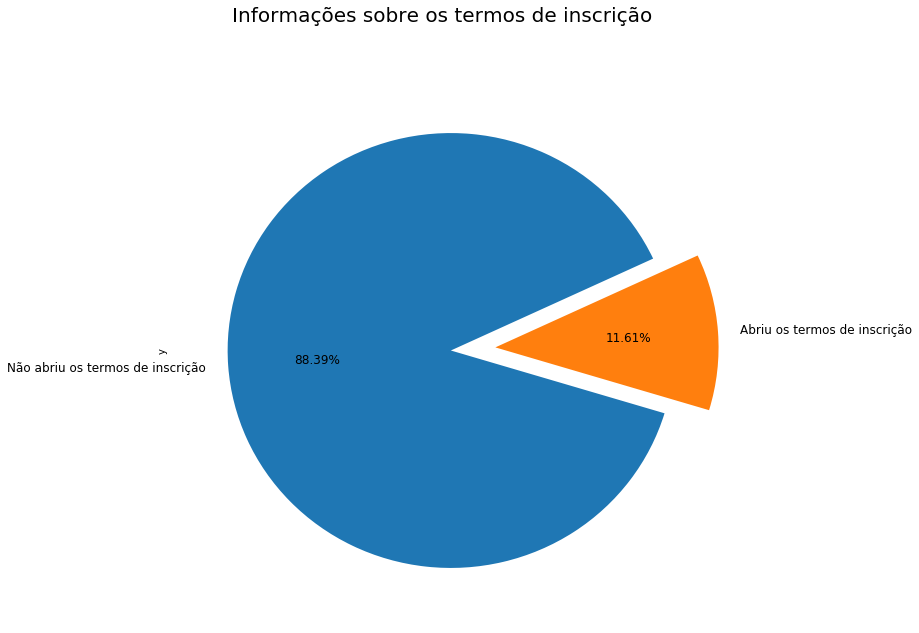

In [7]:
fig1, ax1 = plt.subplots(figsize=(10,10))

labels = 'Não abriu os termos de inscrição', 'Abriu os termos de inscrição'
plt.suptitle('Informações sobre os termos de inscrição', fontsize=20)

df_treino['y'].value_counts().plot.pie(explode = [0, 0.2],autopct='%1.2f%%', ax = ax1, labels=labels, fontsize=12, startangle=25)
plt.show()

# Exploratory Data Analysis 

## Age

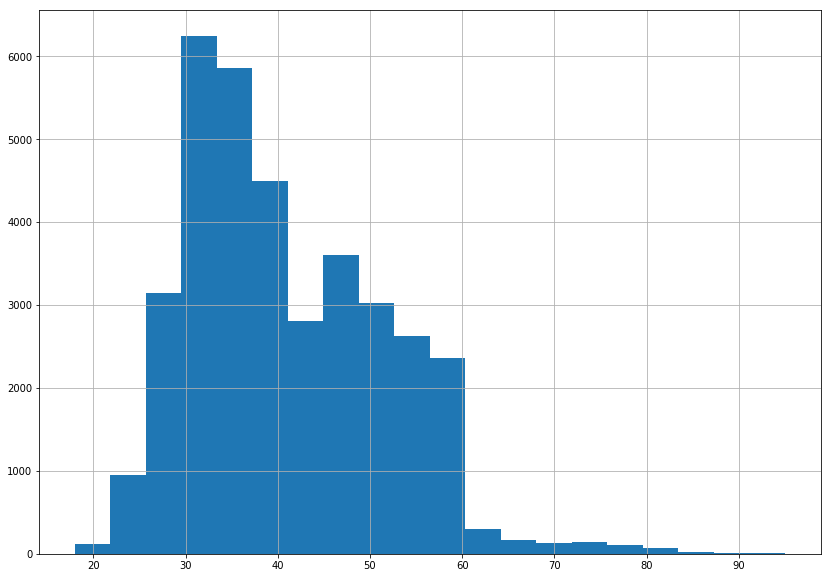

In [8]:
df_treino['age'].hist(bins=20,figsize=(14,10))

C:\Users\josue\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\josue\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\josue\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


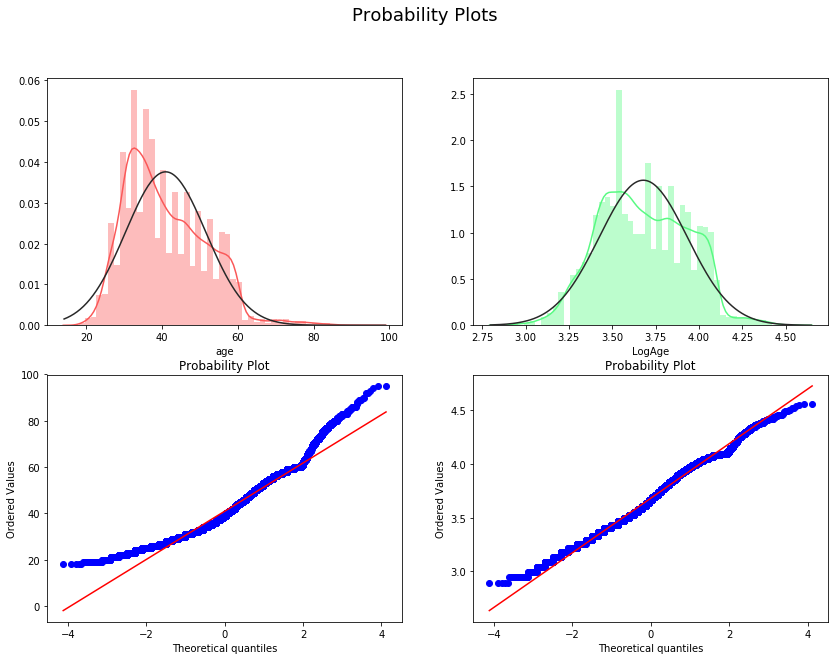

In [9]:
df_treino['LogAge'] = np.log(df_treino['age']) # log of salesprice

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize=(14,10))
plt.suptitle('Probability Plots', fontsize=18)
ax1 = sns.distplot(df_treino['age'], color="#FA5858", ax=ax1, fit=norm)
ax2 = sns.distplot(df_treino['LogAge'], color="#58FA82",ax=ax2, fit=norm)
ax3 = stats.probplot(df_treino['age'], plot=ax3)
ax4 = stats.probplot(df_treino['LogAge'], plot=ax4)

In [10]:
df_teste['LogAge'] = np.log(df_teste['age']) # log of salesprice

C:\Users\josue\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


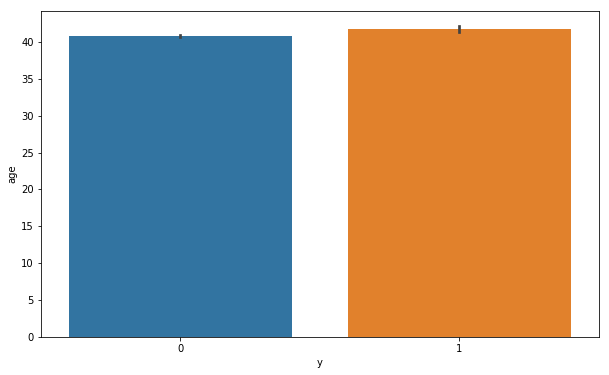

In [11]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'y', y = 'age', data = df_treino)

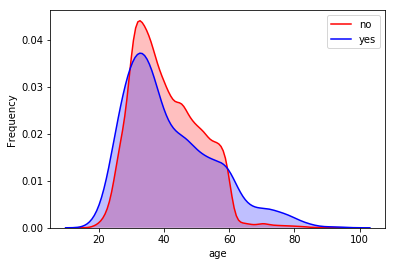

In [12]:
g = sns.kdeplot(df_treino["age"][(df_treino["y"] == 0)], color="Red", shade = True)
g = sns.kdeplot(df_treino["age"][(df_treino["y"] == 1)], ax =g, color="Blue", shade= True)
g.set_xlabel("age")
g.set_ylabel("Frequency")
g = g.legend(["no","yes"])

{'whiskers': [<matplotlib.lines.Line2D at 0x176e5fab0b8>,
 'caps': [<matplotlib.lines.Line2D at 0x176e5fab978>,
 'boxes': [<matplotlib.lines.Line2D at 0x176e5fa4f28>],
 'medians': [<matplotlib.lines.Line2D at 0x176e5fb4208>],
 'fliers': [<matplotlib.lines.Line2D at 0x176e5fb4630>],
 'means': []}

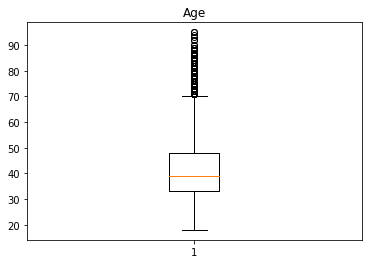

In [13]:
fig1, ax1 = plt.subplots()
ax1.set_title('Age')
ax1.boxplot(df_treino['age'])

{'whiskers': [<matplotlib.lines.Line2D at 0x176e5ffff98>,
 'caps': [<matplotlib.lines.Line2D at 0x176e600a898>,
 'boxes': [<matplotlib.lines.Line2D at 0x176e5fffe48>],
 'medians': [<matplotlib.lines.Line2D at 0x176e6014128>],
 'fliers': [<matplotlib.lines.Line2D at 0x176e6014550>],
 'means': []}

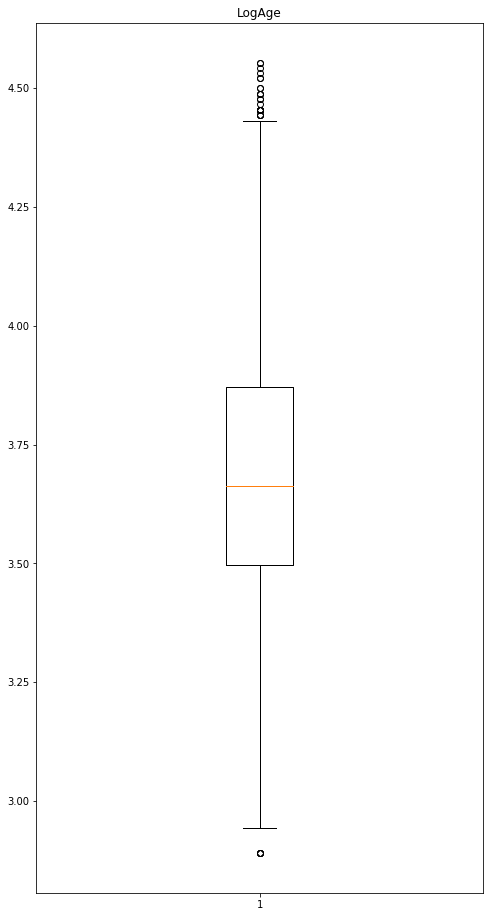

In [14]:
fig1, ax1 = plt.subplots(figsize=(8,16))
ax1.set_title('LogAge')
ax1.boxplot(df_treino['LogAge'])

Creating Age Bands

In [15]:
df_treino['AgeBand'] = pd.qcut(df['age'], 10)
df_treino[["AgeBand", "y"]].groupby(['AgeBand'], as_index=False).mean().sort_values(by='y', ascending=False)

C:\Users\josue\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,AgeBand,y
9,"(56.0, 95.0]",0.202543
0,"(17.999, 29.0]",0.174160
3,"(34.0, 36.0]",0.110961
1,"(29.0, 32.0]",0.107584
2,"(32.0, 34.0]",0.102034
4,"(36.0, 39.0]",0.099437
8,"(51.0, 56.0]",0.091532
7,"(46.0, 51.0]",0.091436
6,"(42.0, 46.0]",0.089572
5,"(39.0, 42.0]",0.086535


In [16]:
df_treino["AgeBand"] = np.nan
lst = [df_treino,df_teste]
for col in lst:
    col.loc[col["age"] < 30, "AgeBand"] = "youngadult"
    col.loc[(col["age"] >= 30) & (col["age"] < 40), "AgeBand"] = "Adult1"
    col.loc[(col["age"] >= 40) & (col["age"] <= 56), "AgeBand"] = "Adult2"
    col.loc[col["age"] > 56, "AgeBand"] = "Old"

C:\Users\josue\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\josue\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
C:\Users\josue\Anaconda3\lib\site-packages\pandas\core\indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the doc

In [17]:
df_treino[["AgeBand", "y"]].groupby(['AgeBand'], as_index=False).mean().sort_values(by='y', ascending=False)

,AgeBand,y
2,Old,0.202543
3,youngadult,0.174160
0,Adult1,0.104987
1,Adult2,0.089895


In [18]:
age_mapping = {'Adult2' : 0, 'Adult1':1, 'youngadult':2, 'Old':3}
df_treino['AgeBand'] = df_treino['AgeBand'].map(age_mapping)
df_teste['AgeBand'] = df_teste['AgeBand'].map(age_mapping)

C:\Users\josue\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\josue\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [19]:
df_treino.corr()['y'].sort_values(ascending=False)

y           1.000000
duration    0.393402
AgeBand     0.110191
pdays       0.105742
previous    0.092051
balance     0.052518
age         0.026684
LogAge      0.003257
day        -0.025887
campaign   -0.072571
Name: y, dtype: float64

## Balance

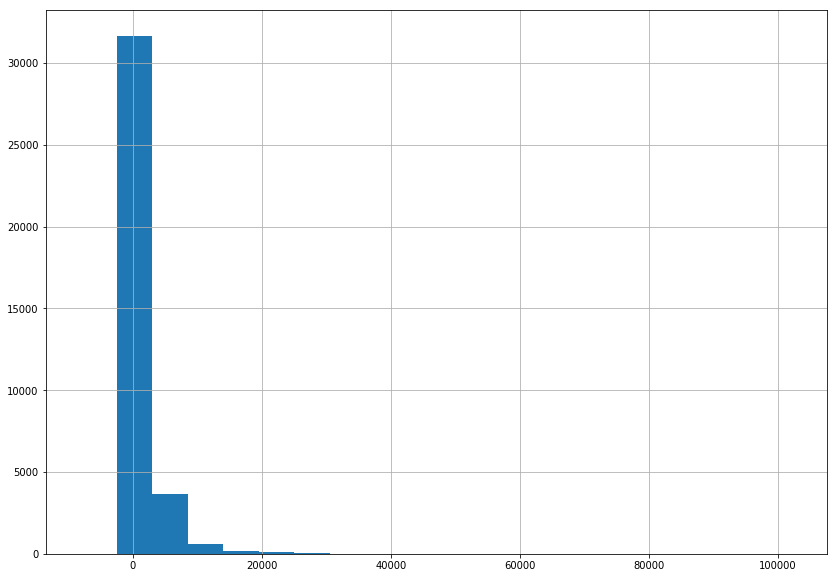

In [20]:
df_treino['balance'].hist(bins=20,figsize=(14,10))

{'whiskers': [<matplotlib.lines.Line2D at 0x176e45b11d0>,
 'caps': [<matplotlib.lines.Line2D at 0x176e45b1a90>,
 'boxes': [<matplotlib.lines.Line2D at 0x176e45b1080>],
 'medians': [<matplotlib.lines.Line2D at 0x176e45ba320>],
 'fliers': [<matplotlib.lines.Line2D at 0x176e45ba748>],
 'means': []}

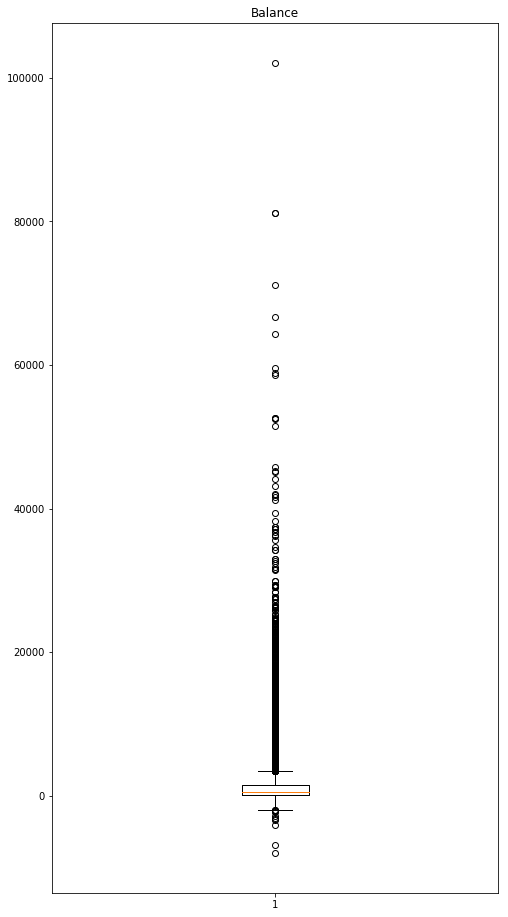

In [21]:
fig1, ax1 = plt.subplots(figsize=(8,16))
ax1.set_title('Balance')
ax1.boxplot(df_treino['balance'])

In [22]:
df_treino["pn"] = np.nan
df_teste['pn'] = np.nan
lst = [df_treino,df_teste]
for col in lst:
    col.loc[(col["balance"] >=0 ),'pn'] = 1
    col.loc[(col["balance"] <0 ),'pn'] = -1


C:\Users\josue\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\josue\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\josue\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pan

In [23]:
df_treino['LogBalance']=abs(df_treino['balance'])
df_teste['LogBalance']=abs(df_teste['balance'])

C:\Users\josue\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\josue\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [24]:
df_treino['LogBalance']=(df_treino['LogBalance'])**(1/4)
df_teste['LogBalance']=(df_teste['LogBalance'])**(1/4)
df_treino['LogBalance']=df_treino['LogBalance']*df_treino['pn']
df_teste['LogBalance']=df_teste['LogBalance']*df_teste['pn']

C:\Users\josue\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\josue\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\josue\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.

C:\Users\josue\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\josue\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


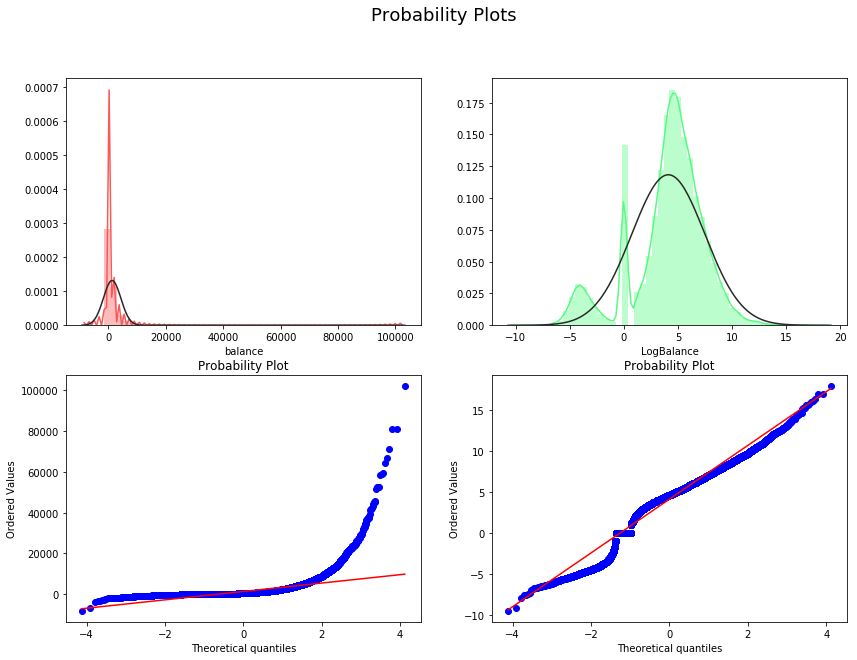

In [25]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize=(14,10))
plt.suptitle('Probability Plots', fontsize=18)
ax1 = sns.distplot(df_treino['balance'], color="#FA5858", ax=ax1, fit=norm)
ax2 = sns.distplot(df_treino['LogBalance'], color="#58FA82",ax=ax2, fit=norm)
ax3 = stats.probplot(df_treino['balance'], plot=ax3)
ax4 = stats.probplot(df_treino['LogBalance'], plot=ax4)

In [26]:
df_treino['BalanceBand'] = pd.qcut(df['balance'], 15)
df_treino[["BalanceBand", "y"]].groupby(['BalanceBand'], as_index=False).mean().sort_values(by='y', ascending=False)

C:\Users\josue\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,BalanceBand,y
13,"(2814.0, 4833.0]",0.178912
12,"(1859.0, 2814.0]",0.157173
14,"(4833.0, 102127.0]",0.147919
11,"(1320.0, 1859.0]",0.141376
10,"(955.0, 1320.0]",0.132806
9,"(701.0, 955.0]",0.121787
6,"(272.0, 382.0]",0.118694
8,"(523.0, 701.0]",0.118531
7,"(382.0, 523.0]",0.118149
4,"(91.0, 175.0]",0.112616


In [27]:
df_treino["Balance"] = np.nan
df_teste['Balance'] = np.nan
lst = [df_treino,df_teste]
for col in lst:
    col.loc[col["balance"] <= 91, "Balance"] = "low"
    col.loc[(col["balance"] > 91) & (col["balance"] <= 955), "Balance"] = "medium"
    col.loc[(col["balance"] > 955) & (col["balance"] <= 1859), "Balance"] = "mediumh"
    col.loc[(col["balance"] > 1859) & (col["balance"] <= 2814), "Balance"] = "h"
    col.loc[(col["balance"] > 2814) & (col["balance"] <= 4833), "Balance"] = "H"
    col.loc[col["balance"] > 4833, "Balance"] = "High"

C:\Users\josue\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\josue\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\josue\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pan

In [28]:
df_treino[["Balance", "y"]].groupby(['Balance'], as_index=False).mean().sort_values(by='y', ascending=False)

,Balance,y
0,H,0.178912
2,h,0.157173
1,High,0.147919
5,mediumh,0.137100
4,medium,0.115812
3,low,0.072333


In [29]:
balance_mapping = {'low' : 0, 'medium':1, 'mediumh':2, 'High':3,'h':4,'H':5}
df_treino['Balance'] = df_treino['Balance'].map(balance_mapping)
df_teste['Balance'] = df_teste['Balance'].map(balance_mapping)

C:\Users\josue\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\josue\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


{'whiskers': [<matplotlib.lines.Line2D at 0x176e59cc358>,
 'caps': [<matplotlib.lines.Line2D at 0x176e59cc438>,
 'boxes': [<matplotlib.lines.Line2D at 0x176e59cc2b0>],
 'medians': [<matplotlib.lines.Line2D at 0x176e59d66a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x176e59d6a90>],
 'means': []}

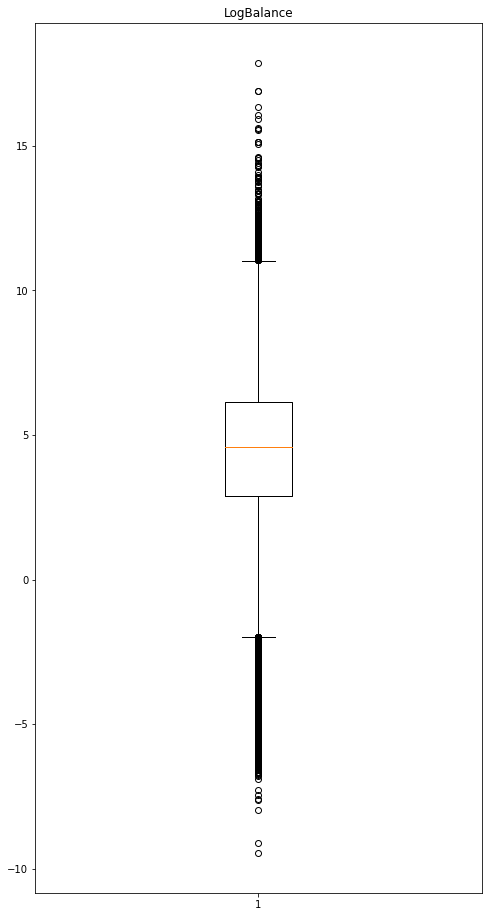

In [30]:
fig1, ax1 = plt.subplots(figsize=(8,16))
ax1.set_title('LogBalance')
ax1.boxplot(df_treino['LogBalance'])

In [31]:
df_treino=df_treino.drop('pn',axis=1)
df_teste=df_teste.drop('pn',axis=1)

In [32]:
df_treino=df_treino.drop('BalanceBand',axis=1)

## Duration

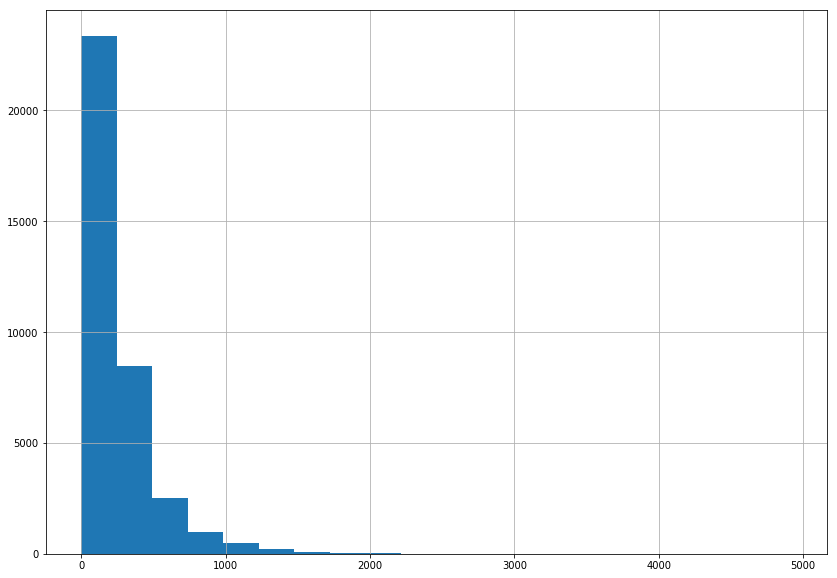

In [33]:
df_treino['duration'].hist(bins=20,figsize=(14,10))

In [34]:
df_treino["LogDuration"] = np.nan
df_teste['LogDuration'] = np.nan
lst = [df_treino,df_teste]
for col in lst:
    col.loc[col["duration"] == 0, "LogDuration"] = 1
    col.loc[col["duration"] != 0, "LogDuration"] = np.sqrt(col["duration"])
df_treino['LogDuration']=np.log(df_treino['LogDuration'])
df_teste['LogDuration']=np.log(df_teste['LogDuration'])


C:\Users\josue\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\josue\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


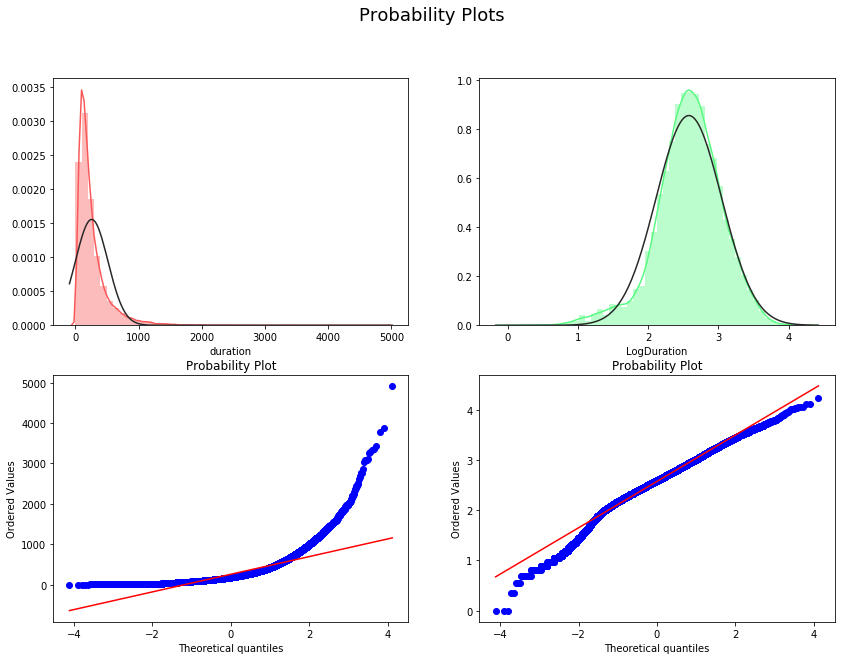

In [35]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize=(14,10))
plt.suptitle('Probability Plots', fontsize=18)
ax1 = sns.distplot(df_treino['duration'], color="#FA5858", ax=ax1, fit=norm)
ax2 = sns.distplot(df_treino['LogDuration'], color="#58FA82",ax=ax2, fit=norm)
ax3 = stats.probplot(df_treino['duration'], plot=ax3)
ax4 = stats.probplot(df_treino['LogDuration'], plot=ax4)

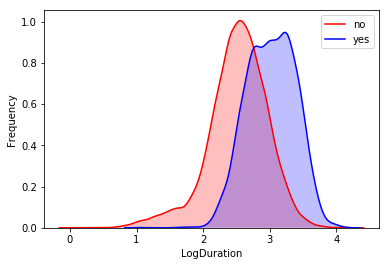

In [36]:
g = sns.kdeplot(df_treino["LogDuration"][(df_treino["y"] == 0)], color="Red", shade = True)
g = sns.kdeplot(df_treino["LogDuration"][(df_treino["y"] == 1)], ax =g, color="Blue", shade= True)
g.set_xlabel("LogDuration")
g.set_ylabel("Frequency")
g = g.legend(["no","yes"])

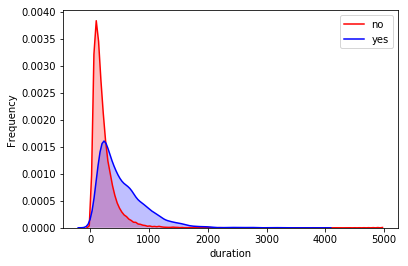

In [37]:
g = sns.kdeplot(df_treino["duration"][(df_treino["y"] == 0)], color="Red", shade = True)
g = sns.kdeplot(df_treino["duration"][(df_treino["y"] == 1)], ax =g, color="Blue", shade= True)
g.set_xlabel("duration")
g.set_ylabel("Frequency")
g = g.legend(["no","yes"])

## Campaign
number of contacts performed during this campaign and for this client (numeric, includes last contact)

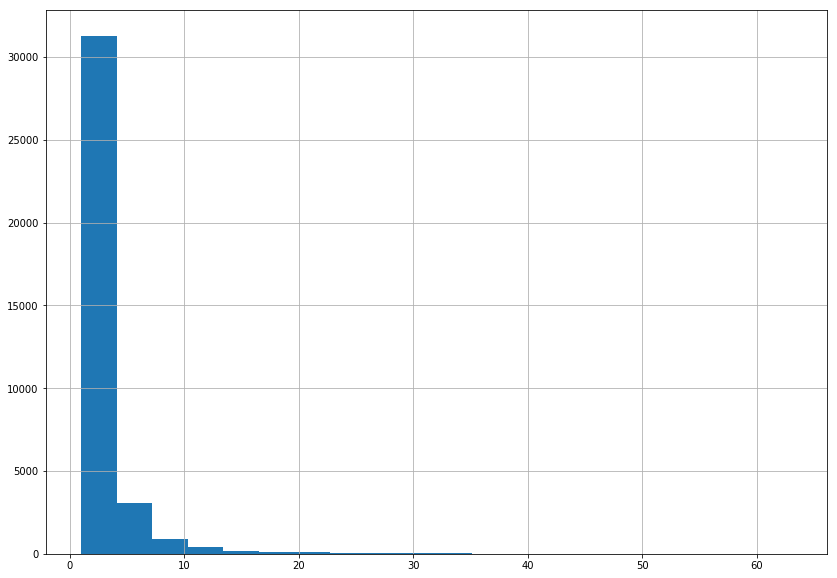

In [38]:
df_treino['campaign'].hist(bins=20,figsize=(14,10))

In [39]:
df_treino["LogC"] = df_treino['campaign']
df_teste['LogC'] = df_teste['campaign']
df_treino['LogC']=np.sqrt(df_treino['LogC'])
df_teste['LogC']=np.sqrt(df_teste['LogC'])
#df_treino['LogC']=np.log(df_treino['LogC'])
#df_teste['LogC']=np.log(df_teste['LogC'])

C:\Users\josue\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\josue\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


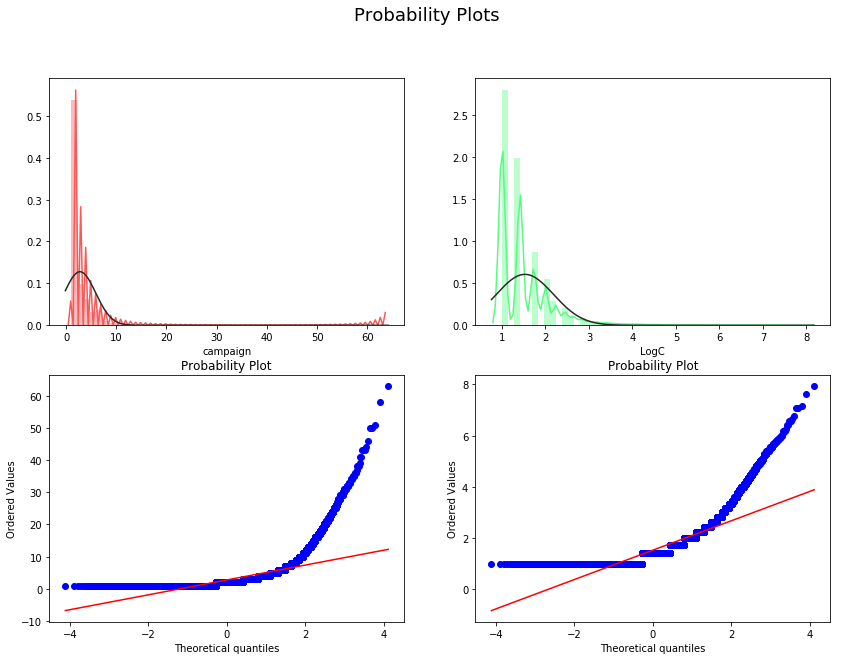

In [40]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize=(14,10))
plt.suptitle('Probability Plots', fontsize=18)
ax1 = sns.distplot(df_treino['campaign'], color="#FA5858", ax=ax1, fit=norm)
ax2 = sns.distplot(df_treino['LogC'], color="#58FA82",ax=ax2, fit=norm)
ax3 = stats.probplot(df_treino['campaign'], plot=ax3)
ax4 = stats.probplot(df_treino['LogC'], plot=ax4)

In [41]:
outlierC=df_treino['campaign'].mean()+3*df_treino['campaign'].std()

In [42]:
df_treino["CampaignOut"] = np.nan
df_teste['CampaignOut'] = np.nan
lst = [df_treino,df_teste]
for col in lst:
    col.loc[col["campaign"] > outlierC, "CampaignOut"] = outlierC
    col.loc[col["campaign"] <= outlierC, "CampaignOut"] = col["campaign"]


In [43]:
df_treino["LogCampaignOut"] = df_treino['CampaignOut']
df_teste['LogCampaignOut'] = df_teste['CampaignOut']
df_treino['LogCampaignOut']=(df_treino['LogCampaignOut'])**(1/3)
df_teste['LogCampaignOut']=(df_teste['LogCampaignOut'])**(1/3)

C:\Users\josue\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\josue\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


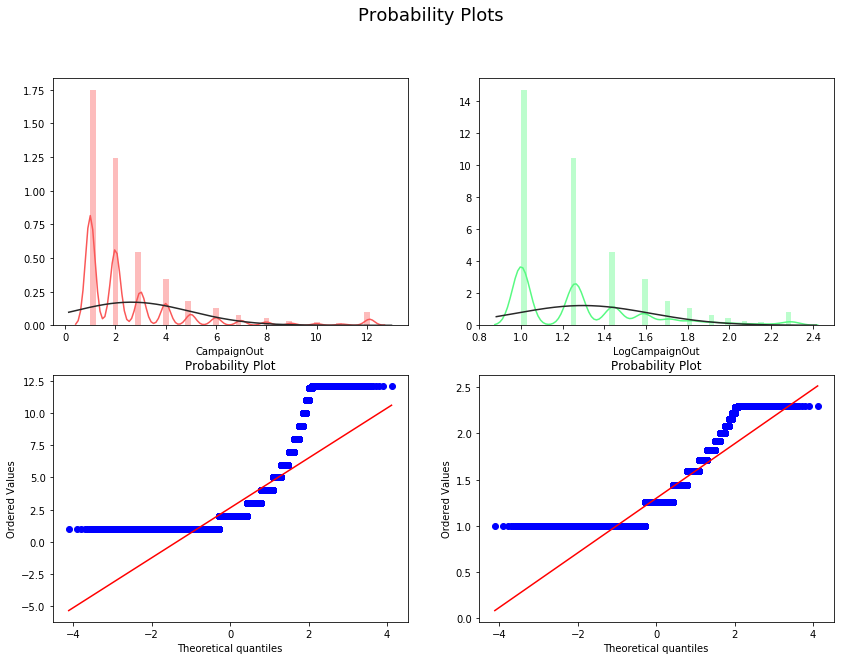

In [44]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize=(14,10))
plt.suptitle('Probability Plots', fontsize=18)
ax1 = sns.distplot(df_treino['CampaignOut'], color="#FA5858", ax=ax1, fit=norm)
ax2 = sns.distplot(df_treino['LogCampaignOut'], color="#58FA82",ax=ax2, fit=norm)
ax3 = stats.probplot(df_treino['CampaignOut'], plot=ax3)
ax4 = stats.probplot(df_treino['LogCampaignOut'], plot=ax4)

## Day and Month

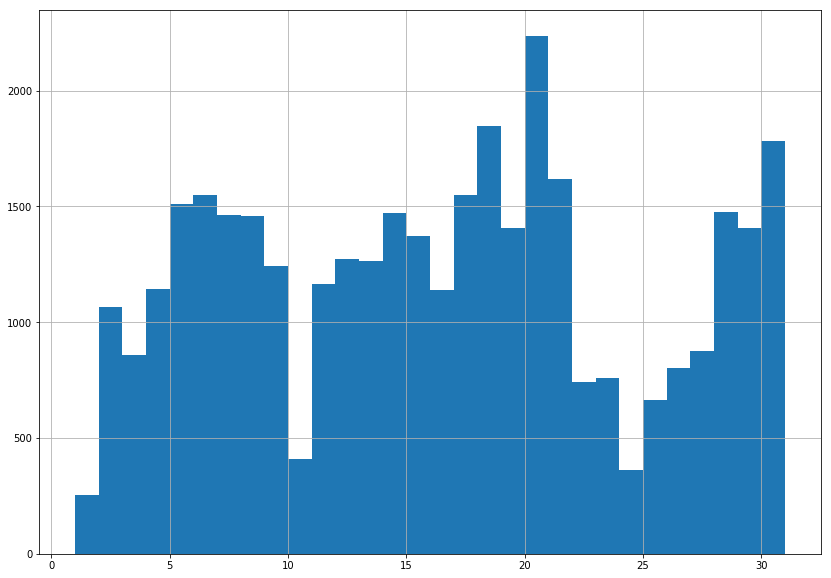

In [45]:
df_treino['day'].hist(bins=30,figsize=(14,10))

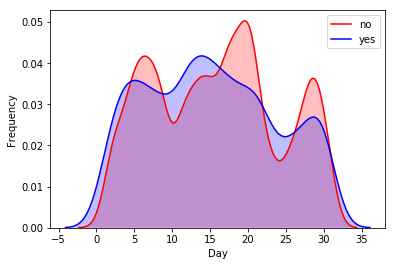

In [46]:
g = sns.kdeplot(df_treino["day"][(df_treino["y"] == 0)], color="Red", shade = True)
g = sns.kdeplot(df_treino["day"][(df_treino["y"] == 1)], ax =g, color="Blue", shade= True)
g.set_xlabel("Day")
g.set_ylabel("Frequency")
g = g.legend(["no","yes"])

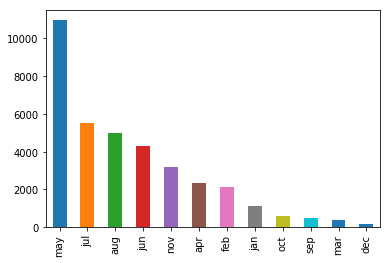

In [47]:
df_treino['month']=df_treino_original['month']
df_treino['month'].value_counts().plot(kind='bar')

In [48]:
month_mapping = {'apr': 3,
 'aug': 7,
 'dec': 11,
 'feb': 1,
 'jan': 0,
 'jul': 6,
 'jun': 5,
 'mar': 2,
 'may': 4,
 'nov': 10,
 'oct': 9,
 'sep': 8}
df_treino['month'] = df_treino['month'].map(month_mapping)
df_teste['month'] = df_teste['month'].map(month_mapping)

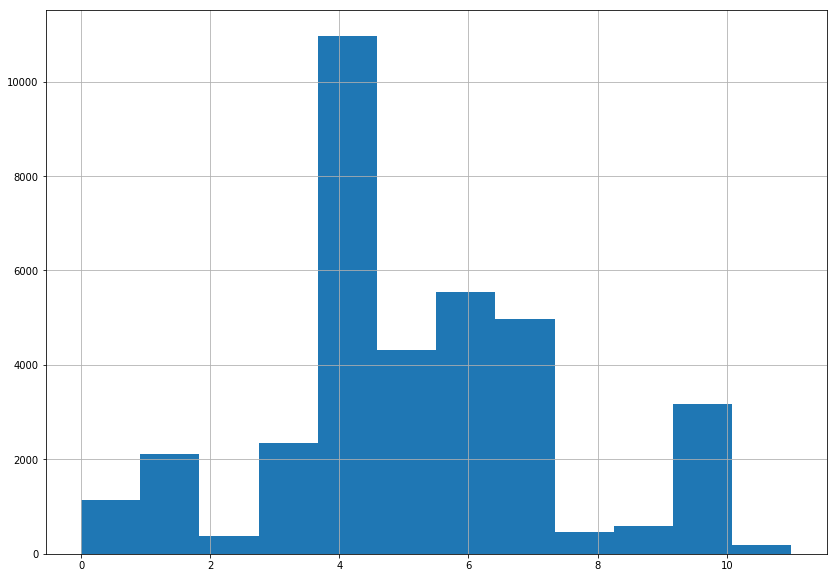

In [49]:
df_treino['month'].hist(bins=12,figsize=(14,10))

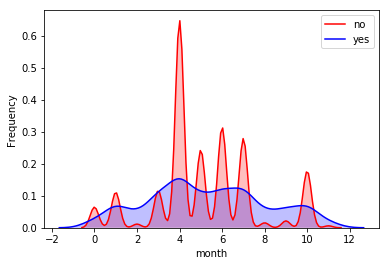

In [50]:
g = sns.kdeplot(df_treino["month"][(df_treino["y"] == 0)], color="Red", shade = True)
g = sns.kdeplot(df_treino["month"][(df_treino["y"] == 1)], ax =g, color="Blue", shade= True)
g.set_xlabel("month")
g.set_ylabel("Frequency")
g = g.legend(["no","yes"])

## Pdays
number of days that passed by after the client was last contacted from a previous campaign (numeric; -1 means client was not previously contacted)

In [51]:
df_teste['pdays']=df_teste_original['pdays']
df_treino['pdays']=df_treino_original['pdays']
outlierPd=df_treino['pdays'].mean()+3*df_treino['pdays'].std()
df_treino["PdaysOut"] = df_treino['pdays']+1
df_teste['PdaysOut'] = df_teste['pdays']+1
lst = [df_treino,df_teste]
for col in lst:
    col.loc[col["pdays"] > outlierPd, "PdaysOut"] = outlierPd +1
    col.loc[col["pdays"] <=0, "PdaysOut"] = 1


In [52]:
outlierPd=df_treino['pdays'].mean()+3*df_treino['pdays'].std()
df_treino["Pdaystest"] = df_treino['pdays']+1
df_teste['Pdaystest'] = df_teste['pdays']+1
lst = [df_treino,df_teste]
for col in lst:
    col.loc[col["pdays"] <=0, "Pdaystest"] = 1
df_treino["Pdaystest"] = np.log(df_treino['Pdaystest'])
df_teste['Pdaystest'] = np.log(df_teste['Pdaystest'])

C:\Users\josue\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\josue\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


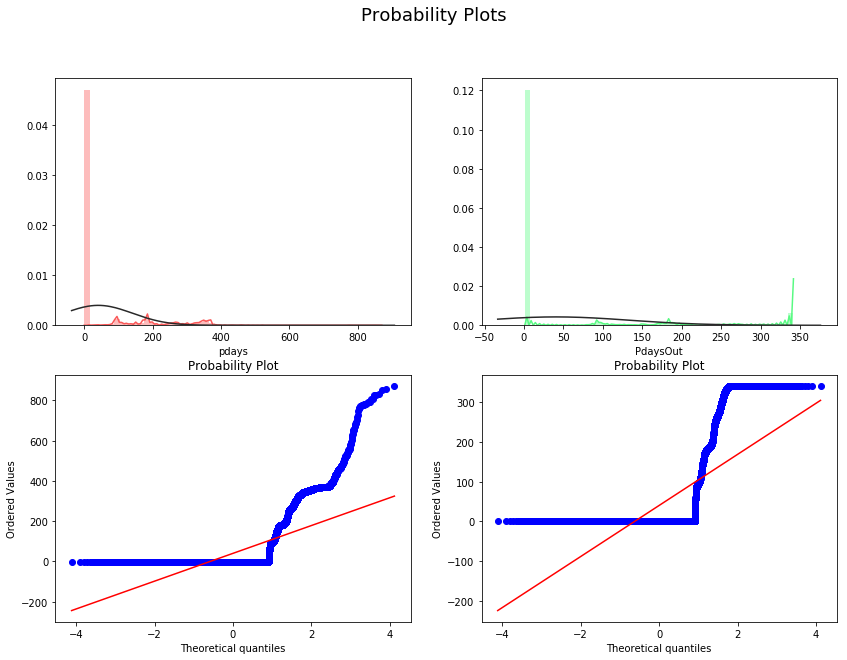

In [53]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize=(14,10))
plt.suptitle('Probability Plots', fontsize=18)
ax1 = sns.distplot(df_treino['pdays'], color="#FA5858", ax=ax1, fit=norm)
ax2 = sns.distplot(df_treino['PdaysOut'], color="#58FA82",ax=ax2, fit=norm)
ax3 = stats.probplot(df_treino['pdays'], plot=ax3)
ax4 = stats.probplot(df_treino['PdaysOut'], plot=ax4)

In [54]:
df_treino["SPdays"] = np.nan
df_teste['SPdays'] = np.nan
lst = [df_treino,df_teste]
for col in lst:
    col.loc[col["pdays"] >= 0, "SPdays"] = col["pdays"] +1
    col.loc[col["pdays"] <0, "SPdays"] = 0
df_treino['SPdays']=(df_treino['SPdays'])**(1/3)
df_teste['SPdays']=(df_teste['SPdays'])**(1/3)

C:\Users\josue\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\josue\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


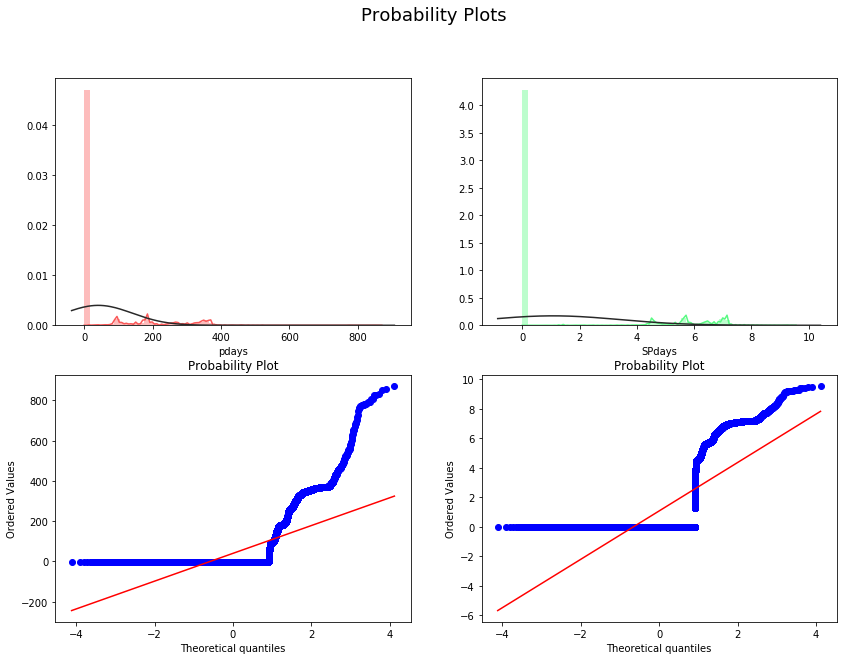

In [55]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize=(14,10))
plt.suptitle('Probability Plots', fontsize=18)
ax1 = sns.distplot(df_treino['pdays'], color="#FA5858", ax=ax1, fit=norm)
ax2 = sns.distplot(df_treino['SPdays'], color="#58FA82",ax=ax2, fit=norm)
ax3 = stats.probplot(df_treino['pdays'], plot=ax3)
ax4 = stats.probplot(df_treino['SPdays'], plot=ax4)

## Previous

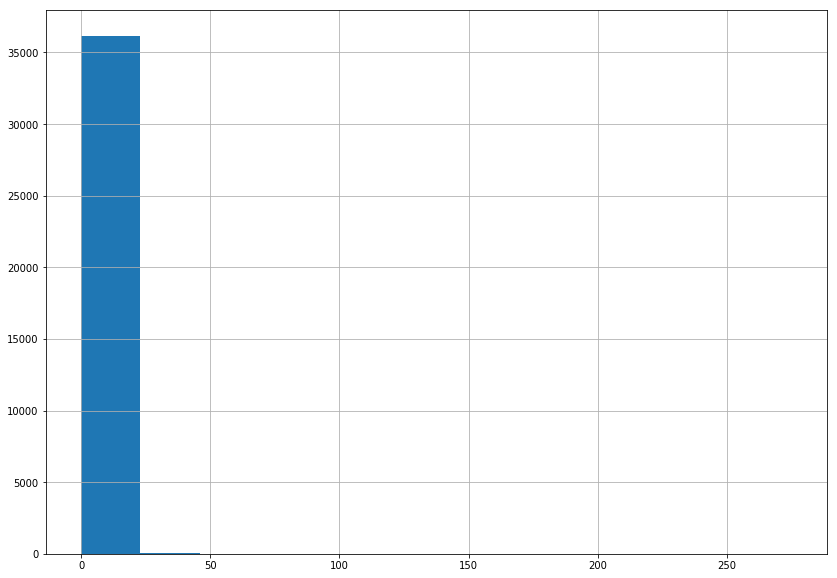

In [56]:
df_treino['previous'].hist(bins=12,figsize=(14,10))

In [57]:
outlierP=df_treino['previous'].mean()+3*df_treino['previous'].std()
df_treino["PreviousOut"] = np.nan
df_teste['PreviousOut'] = np.nan
lst = [df_treino,df_teste]
for col in lst:
    col.loc[col["previous"] > outlierP, "PreviousOut"] = outlierP
    col.loc[(col["previous"] <= outlierC)&(col["previous"] >= 0), "PreviousOut"] = col["previous"]

In [58]:
outlierP

7.692268985787545

C:\Users\josue\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\josue\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


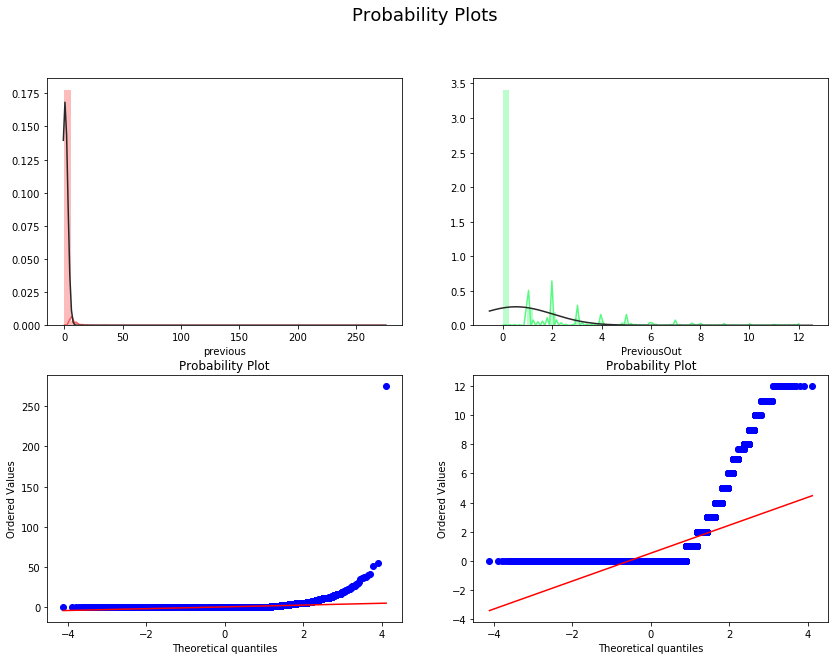

In [59]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize=(14,10))
plt.suptitle('Probability Plots', fontsize=18)
ax1 = sns.distplot(df_treino['previous'], color="#FA5858", ax=ax1, fit=norm)
ax2 = sns.distplot(df_treino['PreviousOut'], color="#58FA82",ax=ax2, fit=norm)
ax3 = stats.probplot(df_treino['previous'], plot=ax3)
ax4 = stats.probplot(df_treino['PreviousOut'], plot=ax4)

In [60]:
df_treino["SqrtPrevious"] = df_treino['previous']
df_teste['SqrtPrevious'] = df_teste['previous']
df_treino['SqrtPrevious']=(df_treino['SqrtPrevious'])**(1/3)
df_teste['SqrtPrevious']=(df_teste['SqrtPrevious'])**(1/3)

C:\Users\josue\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\josue\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


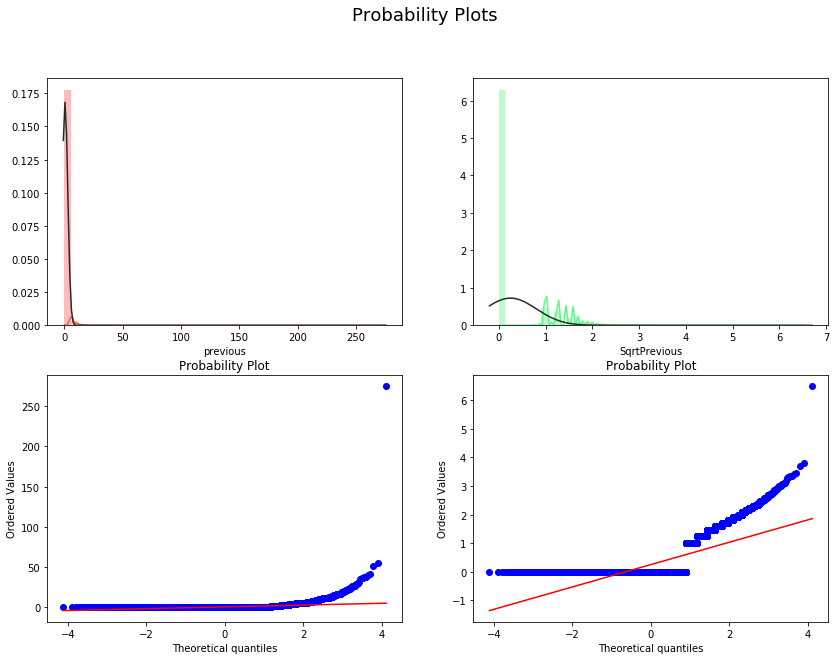

In [61]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize=(14,10))
plt.suptitle('Probability Plots', fontsize=18)
ax1 = sns.distplot(df_treino['previous'], color="#FA5858", ax=ax1, fit=norm)
ax2 = sns.distplot(df_treino['SqrtPrevious'], color="#58FA82",ax=ax2, fit=norm)
ax3 = stats.probplot(df_treino['previous'], plot=ax3)
ax4 = stats.probplot(df_treino['SqrtPrevious'], plot=ax4)

## Job

In [62]:
df_treino[["job", "y"]].groupby(['job'], as_index=False).mean().sort_values(by='y', ascending=False)

,job,y
8,student,0.278976
5,retired,0.222590
10,unemployed,0.160313
4,management,0.135467
6,self-employed,0.122862
0,admin.,0.119894
11,unknown,0.111588
9,technician,0.108760
3,housemaid,0.093812
7,services,0.090746


In [63]:
df_teste['job']=df_teste_original['job']
df_treino['job']=df_treino_original['job']
df_treino["Job"] = np.nan
df_teste['Job'] = np.nan
lst = [df_treino,df_teste]
for col in lst:
    col.loc[(col["job"] == 'blue-collar')|(col["job"] == 'entrepreneur')|(col["job"] == 'services'),'Job'] = "grup1"
    col.loc[(col["job"] == 'housemaid')|(col["job"] == 'technician')|(col["job"] == 'unknown'),'Job'] = "grup3"
    col.loc[(col["job"] == 'admin.')|(col["job"] == 'self-employed')|(col["job"] == 'management'),'Job'] = "grup2"
    col.loc[(col["job"] == 'unemployed')|(col["job"] == 'retired')|(col["job"] == 'student'),'Job'] = col["job"]


In [64]:
job_mapping = {'blue-collar' : 0, 'entrepreneur':1, 'services':2, 'housemaid':3,'technician':4,'unknown':5,'admin.' : 6,'self-employed' : 7,'management' : 8,'unemployed' : 9,'retired' : 10,'student' : 11}
df_treino['job'] = df_treino['job'].map(job_mapping)
df_teste['job'] = df_teste['job'].map(job_mapping)
Job_mapping = {'grup1' : 0, 'grup2':1, 'grup3':2, 'unemployed' : 3,'retired' : 4,'student' : 5}
df_treino['Job'] = df_treino['Job'].map(Job_mapping)
df_teste['Job'] = df_teste['Job'].map(Job_mapping)

In [65]:
df_treino[["Job", "y"]].groupby(['Job'], as_index=False).mean().sort_values(by='y', ascending=False)

,Job,y
5,5,0.278976
4,4,0.222590
3,3,0.160313
1,1,0.129227
2,2,0.106807
0,0,0.078644


## Marital

In [66]:
df_treino[["marital", "y"]].groupby(['marital'], as_index=False).mean().sort_values(by='y', ascending=False)

,marital,y
2,single,0.147637
0,divorced,0.119720
1,married,0.100578


In [67]:
df_teste['marital']=df_teste_original['marital']
df_treino['marital']=df_treino_original['marital']
marital_mapping = {'divorced': 1, 'married': 0, 'single': 2}
df_treino['marital'] = df_treino['marital'].map(marital_mapping)
df_teste['marital'] = df_teste['marital'].map(marital_mapping)
marital_mapping

{'divorced': 1, 'married': 0, 'single': 2}

## Education

In [68]:
df_treino[["education", "y"]].groupby(['education'], as_index=False).mean().sort_values(by='y', ascending=False)

,education,y
2,tertiary,0.148970
3,unknown,0.127444
1,secondary,0.105303
0,primary,0.086377


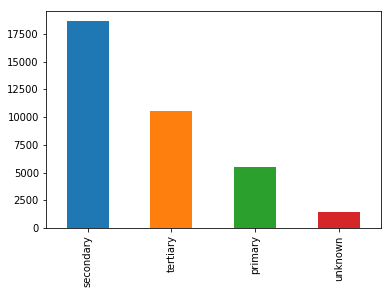

In [69]:
df_treino['education'].value_counts().plot(kind='bar')

In [70]:
educational_mapping = {'tertiary' : 0, 'unknown':1, 'secondary':1, 'primary':3}
df_treino['education'] = df_treino['education'].map(educational_mapping)
df_teste['education'] = df_teste['education'].map(educational_mapping)

## Default, Housing and Loan

In [71]:
default_mapping = {label: idx for idx,label in enumerate(np.unique(df['default']))}
df_treino['default'] = df_treino['default'].map(default_mapping)
df_teste['default'] = df_teste['default'].map(default_mapping)

In [72]:
housing_mapping = {label: idx for idx,label in enumerate(np.unique(df['housing']))}
df_treino['housing'] = df_treino['housing'].map(housing_mapping)
df_teste['housing'] = df_teste['housing'].map(housing_mapping)

In [73]:
loan_mapping = {label: idx for idx,label in enumerate(np.unique(df['loan']))}
df_treino['loan'] = df_treino['loan'].map(loan_mapping)
df_teste['loan'] = df_teste['loan'].map(loan_mapping)

## Contact

In [74]:
df_treino[["contact", "y"]].groupby(['contact'], as_index=False).mean().sort_values(by='y', ascending=False)

,contact,y
0,cellular,0.148270
1,telephone,0.137128
2,unknown,0.038613


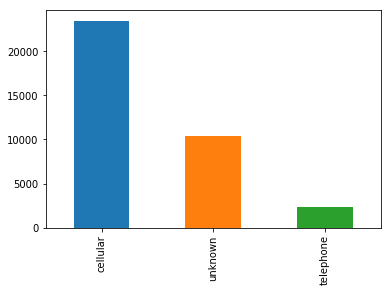

In [75]:
df_treino['contact'].value_counts().plot(kind='bar')

In [76]:
df_treino['contact'].value_counts()

cellular     23464
unknown      10385
telephone     2319
Name: contact, dtype: int64

 cellular >>> telephone

In [77]:
contact_mapping = {'cellular': 1, 'unknown': 1, 'telephone': 0}
df_treino['contact'] = df_treino['contact'].map(contact_mapping)
df_teste['contact'] = df_teste['contact'].map(contact_mapping)

In [78]:
df_treino[["contact", "y"]].groupby(['contact'], as_index=False).mean().sort_values(by='y', ascending=False)

,contact,y
0,0,0.137128
1,1,0.114627


## Poutcome
Outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')

In [79]:
df_treino[["poutcome", "y"]].groupby(['poutcome'], as_index=False).mean().sort_values(by='y', ascending=False)

,poutcome,y
2,success,0.641322
1,other,0.170341
0,failure,0.126891
3,unknown,0.090392


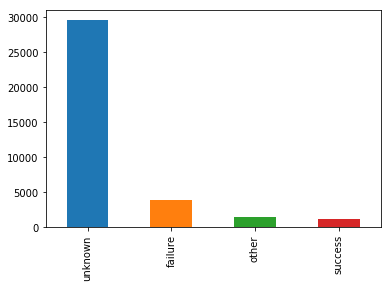

In [80]:
df_treino['poutcome'].value_counts().plot(kind='bar')

In [81]:
poutcome_mapping = {'failure': 2, 'other': 1, 'success': 0, 'unknown': 3}
df_treino['poutcome'] = df_treino['poutcome'].map(poutcome_mapping )
df_teste['poutcome'] = df_teste['poutcome'].map(poutcome_mapping )

In [82]:
cdataset=df_treino[(df_treino['poutcome']==0)|(df_treino['poutcome']==1)|(df_treino['poutcome']==2)]
cpredict=df_treino[(df_treino['poutcome']==3)]

In [83]:
ctreino,cteste = train_test_split(cdataset,test_size = 0.2, random_state=42)

In [84]:
ctreino.corr()['poutcome'].sort_values(ascending=False)

poutcome          1.000000
housing           0.271931
PdaysOut          0.255275
SPdays            0.239839
pdays             0.229703
Pdaystest         0.223108
loan              0.103217
education         0.062785
default           0.031744
contact           0.013837
LogCampaignOut    0.008094
LogC              0.007914
campaign          0.007107
CampaignOut       0.006974
day              -0.011257
LogAge           -0.025652
previous         -0.048027
marital          -0.048610
age              -0.053184
balance          -0.057739
SqrtPrevious     -0.062303
PreviousOut      -0.067440
month            -0.075371
Balance          -0.082321
LogBalance       -0.102029
duration         -0.106015
LogDuration      -0.129996
job              -0.138803
Job              -0.140739
AgeBand          -0.146108
y                -0.407903
Name: poutcome, dtype: float64

In [85]:
ctreino.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y', 'LogAge', 'AgeBand', 'LogBalance',
       'Balance', 'LogDuration', 'LogC', 'CampaignOut', 'LogCampaignOut',
       'PdaysOut', 'Pdaystest', 'SPdays', 'PreviousOut', 'SqrtPrevious',
       'Job'],
      dtype='object')

In [86]:
cXtreino=ctreino.drop(['poutcome'],axis=1)
cytreino=ctreino['poutcome']
cXteste=cteste.drop(['poutcome'],axis=1)
cyteste=cteste['poutcome']

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier


# Build a forest and compute the feature importances
forest = ExtraTreesClassifier(n_estimators=250,
                              random_state=0)

forest.fit(cXtreino, cytreino)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(cXtreino.shape[1]):
    print("%d. feature %s (%f)" % (f + 1, cXtreino.columns[indices[f]], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(cXtreino.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(cXtreino.shape[1]), indices)
plt.xlim([-1, cXtreino.shape[1]])

In [ ]:
cXtreino=ctreino[['PdaysOut',"SqrtPrevious"]]
cytreino=ctreino['poutcome']
cXteste=cteste[['PdaysOut',"SqrtPrevious"]]
cyteste=cteste['poutcome']
cprediction = cpredict[['PdaysOut',"SqrtPrevious"]]

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

In [ ]:
scaler=StandardScaler()
scaler.fit(cXtreino)
cXtreino=scaler.transform(cXtreino)
cXteste=scaler.transform(cXteste)

In [ ]:
svm=SVC(random_state=1)
forest=RandomForestClassifier(criterion='gini',n_estimators=25,max_depth=6,random_state=1,n_jobs=-1)
lreg=LogisticRegression()

In [ ]:
randforest= cross_val_score(forest, cXtreino,cytreino,scoring='accuracy', cv=10)

In [ ]:
print('CV accuracy: %.3f +/- %.3f' %(np.mean(randforest),np.std(randforest)))

In [ ]:
svmscore = cross_val_score(svm, cXtreino,cytreino,scoring='accuracy', cv=10)
lregscore = cross_val_score(lreg, cXtreino,cytreino,scoring='accuracy', cv=10)

In [ ]:
print('CV accuracy: %.3f +/- %.3f' %(np.mean(svmscore),np.std(svmscore)))

In [ ]:
print('CV accuracy: %.3f +/- %.3f' %(np.mean(lregscore),np.std(lregscore)))

In [ ]:
forest.fit(cXtreino,cytreino)
cpf=forest.predict(cXteste)

In [ ]:
forest.score(cXteste,cyteste)

In [ ]:
cprediciton=scaler.transform(cprediction)
prediction=forest.predict(cprediction)
prediction

In [ ]:
df_treino["Poutcome"] = df_treino["poutcome"]
df_teste['Poutcome'] = df_teste['poutcome'] 
lst = [df_treino,df_teste]
for col in lst:
    col.loc[(col["poutcome"] == 3),'Poutcome'] = 2

# Feature Selection

In [ ]:
X=df_treino.drop('y',axis=1)
y=df_treino['y']

In [ ]:
forest = ExtraTreesClassifier(n_estimators=250,
                              random_state=0)

forest.fit(X, y)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %s (%f)" % (f + 1, X.columns[indices[f]], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])

In [ ]:
randforest1= cross_val_score(forest, X,y,scoring='accuracy', cv=10)
print('CV accuracy: %.3f +/- %.3f' %(np.mean(randforest1),np.std(randforest1)))

Apenas com as seguintes features:
1. feature duration (0.132935)
3. feature month (0.062704)
4. feature day (0.056211)
5. feature age (0.048174)
8. feature balance (0.047371)
9. feature Poutcome (0.041694)
11. feature job (0.034495)

In [ ]:
X1=df_treino[['duration','month','day','age','balance','Poutcome','job']]
y1=df_treino['y']

In [ ]:
forest.fit(X1, y1)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X1.shape[1]):
    print("%d. feature %s (%f)" % (f + 1, X1.columns[indices[f]], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X1.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X1.shape[1]), indices)
plt.xlim([-1, X1.shape[1]])

In [ ]:
randforest1= cross_val_score(forest, X1,y1,scoring='accuracy', cv=10)
print('CV accuracy: %.3f +/- %.3f' %(np.mean(randforest1),np.std(randforest1)))

1. feature duration (0.132935)
3. feature month (0.062704)
4. feature day (0.056211)
5. feature age (0.048174)
7. feature LogBalance (0.047907)
9. feature Poutcome (0.041694)
11. feature job (0.034495)
13. feature education (0.025523)

In [ ]:
X2=df_treino[['duration','month','day','age','LogBalance','Poutcome','job']]
y2=df_treino['y']

In [ ]:
forest.fit(X2, y2)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X2.shape[1]):
    print("%d. feature %s (%f)" % (f + 1, X2.columns[indices[f]], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X2.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X2.shape[1]), indices)
plt.xlim([-1, X2.shape[1]])

In [ ]:
randforest1= cross_val_score(forest, X2,y2,scoring='accuracy', cv=10)
print('CV accuracy: %.3f +/- %.3f' %(np.mean(randforest1),np.std(randforest1)))

In [ ]:
forest1=RandomForestClassifier(criterion='gini',n_estimators=25,max_depth=6,random_state=1,n_jobs=-1)
randforest1= cross_val_score(forest1, X2,y2,scoring='accuracy', cv=10)
print('CV accuracy: %.3f +/- %.3f' %(np.mean(randforest1),np.std(randforest1)))

In [ ]:
scaler=StandardScaler()
scaler.fit(X2)
X2std=scaler.transform(X2)

In [ ]:

svm=SVC(random_state=1)
svmscore = cross_val_score(svm, X2,y2,scoring='accuracy', cv=10)
print('CV accuracy: %.3f +/- %.3f' %(np.mean(svmscore),np.std(svmscore)))


In [ ]:
lreg=LogisticRegression()
lregscore = cross_val_score(lreg, X2std,y,scoring='accuracy', cv=10)
print('CV accuracy: %.3f +/- %.3f' %(np.mean(lregscore),np.std(lregscore)))

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X2, y2)

In [ ]:
rf_random.best_params_

In [ ]:
forest1=RandomForestClassifier(criterion='gini',n_estimators= 200,min_samples_split= 5, min_samples_leaf= 4, max_features= 'auto',max_depth= 10,bootstrap= True,random_state=1,n_jobs=-1)
randforest1= cross_val_score(forest, X2,y2,scoring='accuracy', cv=10)

In [ ]:
print('CV accuracy: %.3f +/- %.3f' %(np.mean(randforest1),np.std(randforest1)))

In [ ]:
from sklearn.model_selection import GridSearchCV

# Create logistic regression
logistic = LogisticRegression()

# Create regularization penalty space
penalty = ['l1', 'l2']

# Create regularization hyperparameter space
C = np.logspace(0, 4, 10)

# Create hyperparameter options
hyperparameters = dict(C=C, penalty=penalty)

# Create grid search using 5-fold cross validation
clf = GridSearchCV(logistic, hyperparameters, cv=5, verbose=0)

# Fit grid search
best_model = clf.fit(X2std, y)

# View best hyperparameters
print('Best Penalty:', best_model.best_estimator_.get_params()['penalty'])
print('Best C:', best_model.best_estimator_.get_params()['C'])

In [ ]:
lreg1=LogisticRegression(penalty='l2', C=1)
lregscore1 = cross_val_score(lreg, X2std,y,scoring='accuracy', cv=10)
print('CV accuracy: %.3f +/- %.3f' %(np.mean(lregscore1),np.std(lregscore1)))

In [ ]:
from sklearn.base import clone
from itertools import combinations
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split


class SBS():
    def __init__(self, estimator, k_features, scoring=accuracy_score,
                 test_size=0.25, random_state=1):
        self.scoring = scoring
        self.estimator = clone(estimator)
        self.k_features = k_features
        self.test_size = test_size
        self.random_state = random_state

    def fit(self, X, y):
        
        X_train, X_test, y_train, y_test = \
            train_test_split(X, y, test_size=self.test_size,
                             random_state=self.random_state)

        dim = X_train.shape[1]
        self.indices_ = tuple(range(dim))
        self.subsets_ = [self.indices_]
        score = self._calc_score(X_train, y_train, 
                                 X_test, y_test, self.indices_)
        self.scores_ = [score]

        while dim > self.k_features:
            scores = []
            subsets = []

            for p in combinations(self.indices_, r=dim - 1):
                score = self._calc_score(X_train, y_train, 
                                         X_test, y_test, p)
                scores.append(score)
                subsets.append(p)

            best = np.argmax(scores)
            self.indices_ = subsets[best]
            self.subsets_.append(self.indices_)
            dim -= 1

            self.scores_.append(scores[best])
        self.k_score_ = self.scores_[-1]

        return self

    def transform(self, X):
        return X[:, self.indices_]

    def _calc_score(self, X_train, y_train, X_test, y_test, indices):
        self.estimator.fit(X_train[:, indices], y_train)
        y_pred = self.estimator.predict(X_test[:, indices])
        score = self.scoring(y_test, y_pred)
        return score

In [ ]:
sbs=SBS(forest1,k_features=1)

In [ ]:
scaler2=StandardScaler()
scaler2.fit(X)
Xstd=scaler2.transform(X)
sbs.fit(Xstd,y)

In [ ]:
k_feat = [len(k) for k in sbs.subsets_]

plt.plot(k_feat, sbs.scores_, marker='o')
plt.ylim([0.7, 1.02])
plt.ylabel('Accuracy')
plt.xlabel('Number of features')
plt.grid()
plt.tight_layout()

In [ ]:
k3 = list(sbs.subsets_[25])
print(X.columns[1:][k3])

In [ ]:
X3=df_treino[['loan', 'duration', 'previous', 'LogAge', 'LogC']]
y3=df_treino['y']

In [ ]:
forest3=RandomForestClassifier(criterion='gini',n_estimators= 200,min_samples_split= 5, min_samples_leaf= 4, max_features= 'auto',max_depth= 10,bootstrap= True,random_state=1,n_jobs=-1)
randforest1= cross_val_score(forest3, X3,y3,scoring='accuracy', cv=10)

In [ ]:
print('CV accuracy: %.3f +/- %.3f' %(np.mean(randforest1),np.std(randforest1)))

In [ ]:
from sklearn.model_selection import learning_curve
from sklearn.pipeline import make_pipeline

pipe_lr = make_pipeline(StandardScaler(),
                        RandomForestClassifier(criterion='gini',n_estimators= 200,min_samples_split= 5, min_samples_leaf= 4, max_features= 'auto',max_depth= 10,bootstrap= True,random_state=1,n_jobs=-1))

train_sizes, train_scores, test_scores =\
                learning_curve(estimator=pipe_lr,
                               X=X2,
                               y=y2,
                               train_sizes=np.linspace(0.1, 1.0, 10),
                               cv=10,
                               n_jobs=1)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_mean,
         color='blue', marker='o',
         markersize=5, label='training accuracy')

plt.fill_between(train_sizes,
                 train_mean + train_std,
                 train_mean - train_std,
                 alpha=0.15, color='blue')

plt.plot(train_sizes, test_mean,
         color='green', linestyle='--',
         marker='s', markersize=5,
         label='validation accuracy')

plt.fill_between(train_sizes,
                 test_mean + test_std,
                 test_mean - test_std,
                 alpha=0.15, color='green')

plt.grid()
plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0.8, 1.03])
plt.tight_layout()

In [ ]:
Xt=df_teste[['duration','month','day','age','LogBalance','Poutcome','job']]
yt=df_teste['y']
forest1.fit(X2std,y)
Xtstd=scaler.transform(Xt)
y_pred=forest1.predict(Xtstd)

In [ ]:
forest1.score(Xtstd,yt)

In [ ]:
from sklearn.metrics import confusion_matrix

confmat = confusion_matrix(y_true=yt, y_pred=y_pred)
print(confmat)

In [ ]:
fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')

plt.xlabel('Predicted label')
plt.ylabel('True label')

plt.tight_layout()

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

print('Precision: %.3f' % precision_score(y_true=yt, y_pred=y_pred))
print('Recall: %.3f' % recall_score(y_true=yt, y_pred=y_pred))
print('F1: %.3f' % f1_score(y_true=yt, y_pred=y_pred))